# Test 1. Constant Algorithm

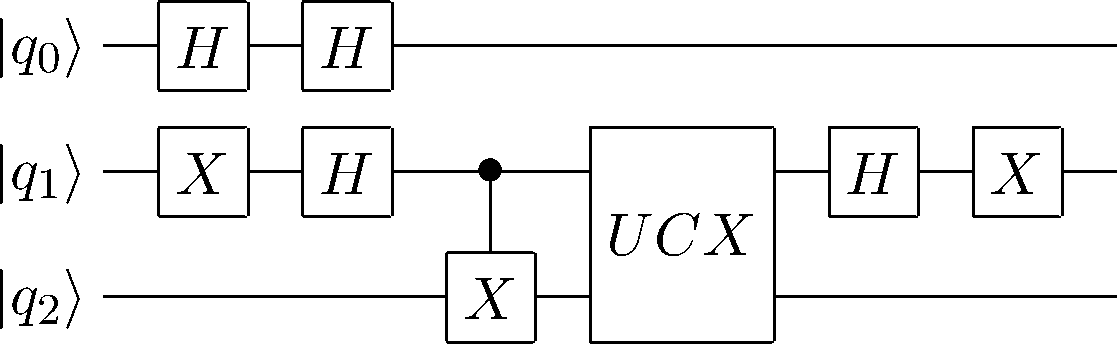

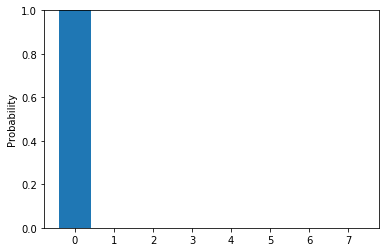

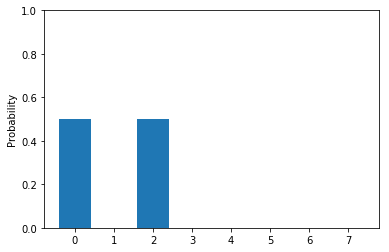

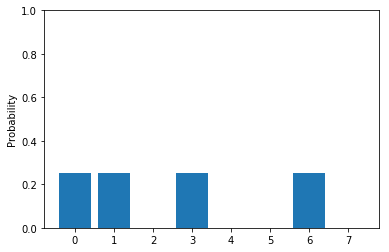

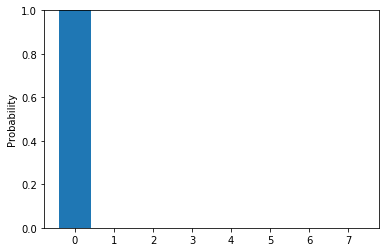

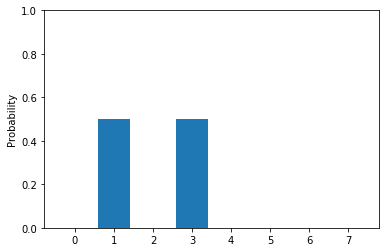

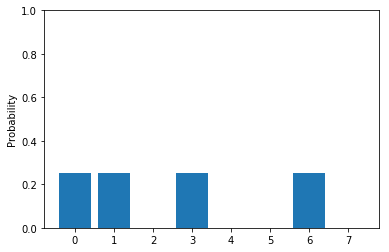

In [5]:
from QCAD import Module, execute
from QCAD import TypicalModule as tm
from QCAD.CircuitDrawer import draw

import numpy as np

UCX = tm.U('UCX', 2, [[1., 0., 0., 0.],
                     [0., 0., 0., 1.],
                     [0., 0., 1., 0.],
                     [0., 1., 0., 0.]])

QC = Module('QC', 3, [tm.H[0],
                     tm.X[1],
                     tm.H[1],
                     tm.CX[1, 2],
                     UCX[1, 2],
                     tm.H[0],
                     tm.H[1],
                     tm.X[1]])

draw(QC, 'decomposed')

execute('MatrixModel', QC, option='barplot')
execute('MatrixModel', QC, initial_state = [[1, 0], [1/np.sqrt(2), 1/np.sqrt(2)], [1, 0]], option='barplot')
execute('MatrixModel', QC, initial_state = [0.5, 0.5, 0, 0.5, 0, 0, 0.5, 0], option='barplot')
execute('Cimulator', QC, option='barplot')
execute('Cimulator', QC, initial_state = [[0, 1], [1/np.sqrt(2), 1/np.sqrt(2)], [1, 0]], option='barplot')
execute('Cimulator', QC, initial_state = [0.5, 0.5, 0, 0.5, 0, 0, 0.5, 0], option='barplot')

# Test 2. Quite Complicated

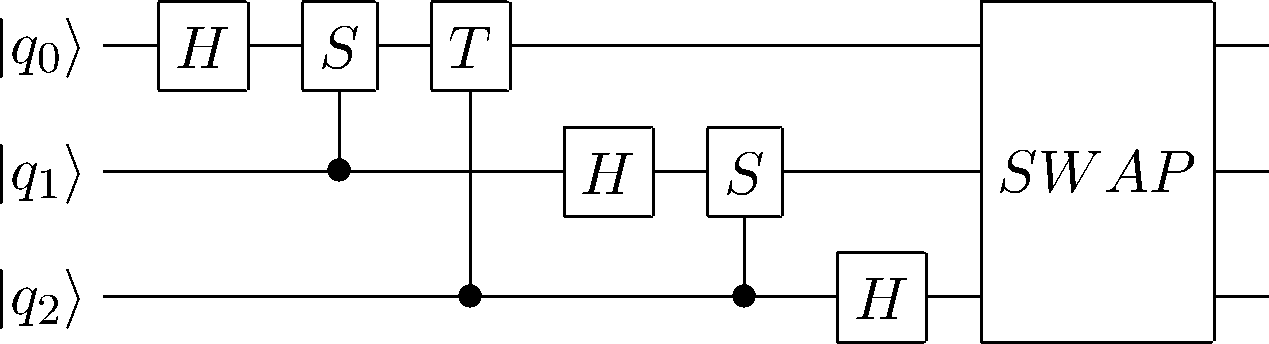

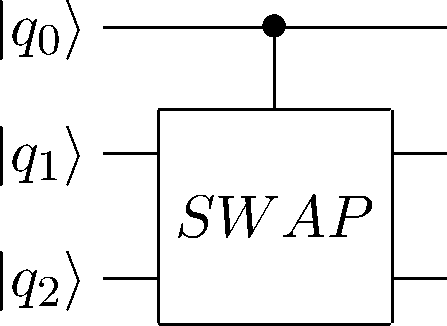

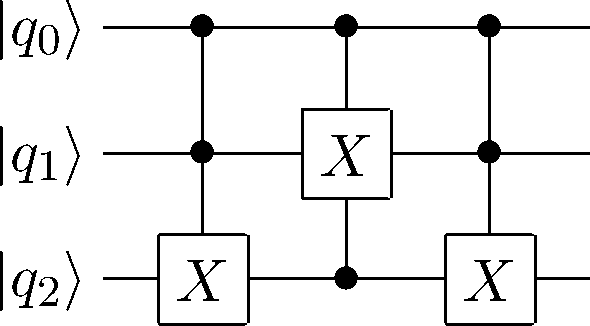

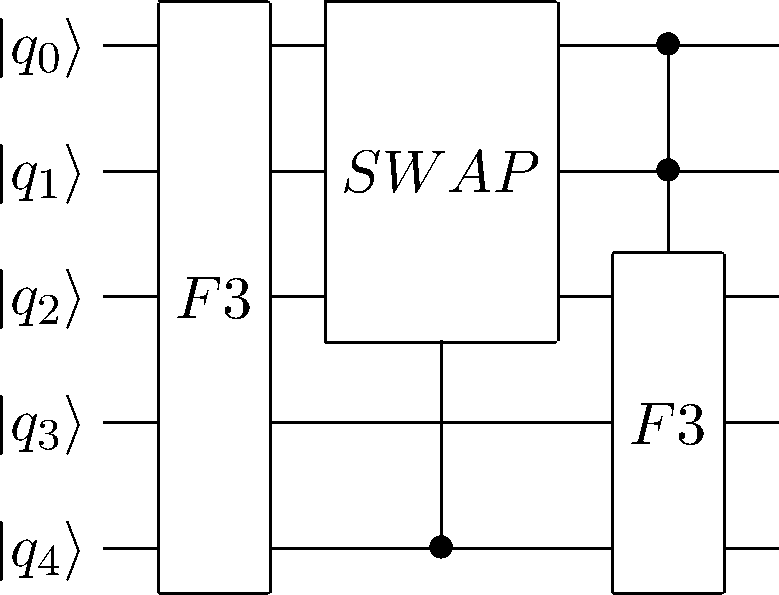

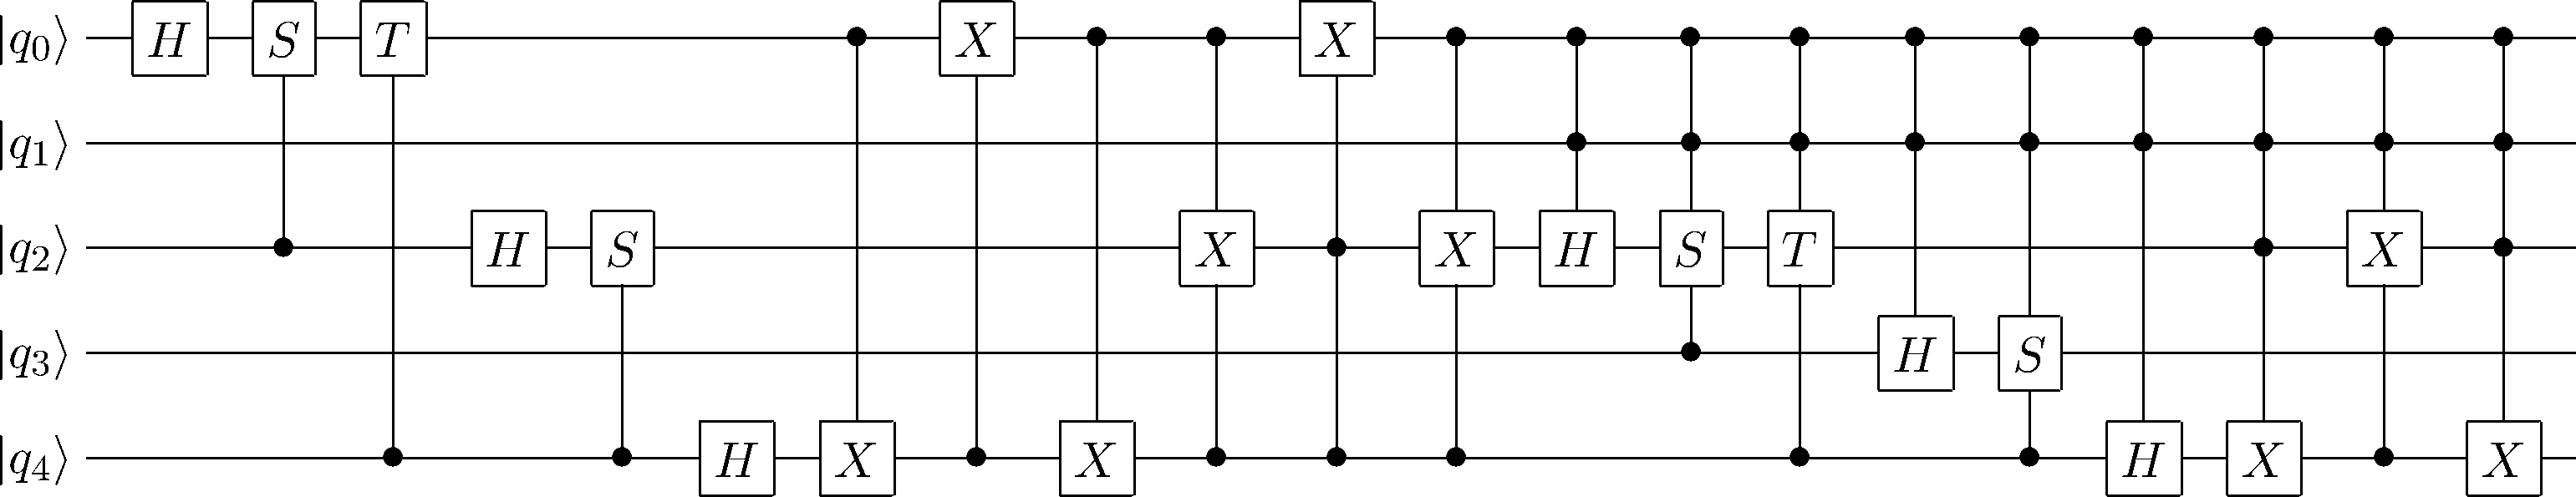

# : State
00000 : (0.35355339059327384+0j)
00001 : (0.35355339059327384+0j)
00100 : (0.35355339059327384+0j)
00101 : (0.35355339059327384+0j)
10000 : (0.35355339059327384+0j)
10001 : (0.35355339059327384+0j)
10100 : (0.35355339059327384+0j)
10101 : (0.35355339059327384+0j)
# : State
00000 : (0.35355339059327384+0j)
00001 : (0.35355339059327384+0j)
00100 : (0.35355339059327384+0j)
00101 : (0.35355339059327384+0j)
10000 : (0.35355339059327384+0j)
10001 : (0.35355339059327384+0j)
10100 : (0.35355339059327384+0j)
10101 : (0.35355339059327384+0j)


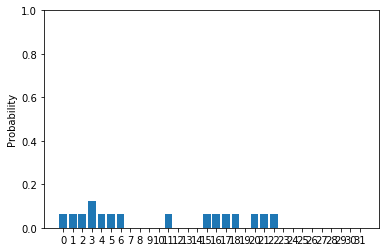

# : State
00000 : (0.25000000000000006+0j)
00001 : (0.25000000000000006+0j)
00010 : (0.25000000000000006+0j)
00011 : (0.35355339059327384+0j)
00100 : (0.25000000000000006+0j)
00101 : (0.25000000000000006+0j)
00110 : (0.25000000000000006+0j)
01011 : (0.17677669529663692+0.17677669529663692j)
01111 : (0.17677669529663692-0.17677669529663692j)
10000 : (0.25000000000000006+0j)
10001 : (0.25000000000000006+0j)
10010 : (0.25000000000000006+0j)
10100 : (0.25000000000000006+0j)
10101 : (0.25000000000000006+0j)
10110 : (0.25000000000000006+0j)


In [2]:
SWAP = Module('SWAP', 2, [tm.CX[0, 1],
                         tm.CX[1, 0],
                         tm.CX[0, 1]])

# Controlled Gates

CH = tm.MCU('CH', 2, [0], tm.H[1])
CS = tm.MCU('CS', 2, [0], tm.S[1])
CT = tm.MCU('CT', 2, [0], tm.T[1])

# Module Fourier3

F3 = Module('F3', 3, [tm.H[0],
                      CS[1, 0],
                      CT[2, 0],
                      tm.H[1],
                      CS[2, 1],
                      tm.H[2],
                      SWAP[0, 2]])

# Module Quantum Circuit

CSWAP = tm.MCU('CSWAP', 3, [0], SWAP[1, 2])

QC = Module('QC', 5, [F3[0, 2, 4],
                      CSWAP[4, 0, 2],
                      tm.MCU('MCF3', 5, [0, 1], F3[2, 3, 4])[0, 1, 2, 3, 4]])

draw(F3)
draw(CSWAP)
draw(CSWAP, 'decomposed')
draw(QC)
draw(QC, option='decomposed')

execute('Cimulator', QC, option='nonzero')
execute('MatrixModel', QC, option='nonzero')
execute('Cimulator', QC, [[1, 0], [1/np.sqrt(2), 1/np.sqrt(2)], [1, 0], [1, 0], [1, 0]], option='barplot')
execute('MatrixModel', QC, [[1, 0], [1/np.sqrt(2), 1/np.sqrt(2)], [1, 0], [1, 0], [1, 0]], option='nonzero')